In [34]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## IRIS DATASET

#### LOAD DATA

In [35]:
# loading data
data = pd.read_csv("iris.csv")
data
# one-hot encoding
species_one_hot = pd.get_dummies(data.label)
data = data.join(species_one_hot)
df = data.drop(columns=["label"],axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [36]:
y = species_one_hot.values
x = df.drop(columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=20,random_state = 7)


### HELPER FUNCTIONS

In [37]:
def accuracy(prediction,labels):
    prediction_correct = prediction.round() == labels
    accuracy = prediction_correct.mean()
    return accuracy
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )
def mean_squared_error(predictions,labels):
    mse = ((predictions - labels)**2).sum()/(2*N)
    return mse

#### parameters

In [38]:
learning_rate = 0.1
N = y_train.size

n_input = 4
n_hidden = 6
n_output = 3
epochs = 50000

In [39]:
np.random.seed(3)

weights_1 = np.random.normal(scale = 0.5 , size = (n_input,n_hidden)) 
weights_2 = np.random.normal(scale = 0.5 , size = (n_hidden,n_output))

monitoring = {'mean_squared_error':[],'Accuracy':[]}

### feedforward and backpropagation

In [40]:
for epoch in range(epochs):
    hidden_layer_inputs = np.dot(X_train,weights_1)   ## (150,4) (4,2) ==> (150,2)
    # pprint(hidden_layer_input,width = 20)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs) ## sigmoid function returns value between (0,1) excluding 0 and 1.
    # pprint(hidden_layer_output,width = 20)

    output_layer_inputs = np.dot(hidden_layer_outputs,weights_2) ## (150,2) (2,3) ==> (150,3)
    output_layer_outputs = sigmoid(output_layer_inputs)

    # pprint(output_layer_output,width = 20)
    ## backpropagation
    mse = mean_squared_error(output_layer_outputs,y_train)
    accuracy_value = accuracy(output_layer_outputs,y_train)
    monitoring['mean_squared_error'].append(mse)
    monitoring['Accuracy'].append(accuracy_value)
    

    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * ( 1 - output_layer_outputs )

    hidden_layer_error = np.dot( output_layer_delta , weights_2.T )
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * ( 1 - hidden_layer_outputs )

    # weight update 
    weights_2_update = np.dot( hidden_layer_outputs.T , output_layer_delta ) / N
    weights_1_update = np.dot( X_train.T , hidden_layer_delta ) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update


In [41]:
monitoring_df = pd.DataFrame(monitoring)
monitoring_df

,mean_squared_error,Accuracy
0,0.114127,0.594872
1,0.114066,0.607692
2,0.114006,0.612821
3,0.113947,0.612821
4,0.113887,0.625641
...,...,...
49995,0.005644,0.989744
49996,0.005644,0.989744
49997,0.005644,0.989744
49998,0.005644,0.989744


<AxesSubplot:title={'center':'Accuracy'}>

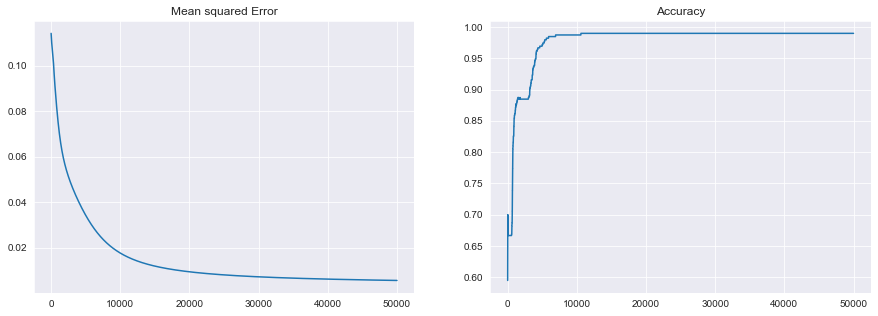

In [46]:
fig ,ax = plt.subplots(1,2,figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax = ax[0],title="Mean squared Error")
monitoring_df.Accuracy.plot(ax = ax[1],title = "Accuracy")
### The error has decreased gradually from the graph and increase in the accuracy.

### TESTING

In [43]:
hidden_layer_inputs = np.dot(X_test,weights_1)  
hidden_layer_outputs = sigmoid(hidden_layer_inputs) 

output_layer_inputs = np.dot(hidden_layer_outputs,weights_2) 
output_layer_outputs = sigmoid(output_layer_inputs)

In [44]:
acc = accuracy(output_layer_outputs,y_test)
print(f"Accuracy :{acc}")

Accuracy :0.9
